In [ ]:
# conda install -c conda-forge wordcloud

In [ ]:
import re, os
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = STOPWORDS.copy()
stopwords.add('will')
stopwords.add('said')

In [ ]:
path = 'bbc-fulltext/bbc/'

In [ ]:
directories = os.listdir(path)
directories

['business', 'entertainment', 'politics', 'README.TXT', 'sport', 'tech']

In [ ]:
directories.remove('README.TXT')
directories

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
# all_files = {'entertainment':[],
#              'sport':[],
#              'business':[],
#              'tech':[],
#             'politics':[]}

all_files = {}

for directory in directories:
    file_path = path + directory + '/'
    files = os.listdir(file_path)
    for file in files:
        if directory not in all_files.keys():
            # Initialize the key
            all_files[directory]= [open(file_path+file).read()]
        else:    
            all_files[directory].append(open(file_path+file).read())

In [ ]:
# all_files

In [ ]:
len(all_files['entertainment'])

386

In [ ]:
wc = WordCloud(max_words=150, stopwords=stopwords, 
               width=2000,height=1000,random_state=123)

In [ ]:
all_ent = ' '.join(all_files['entertainment'])

In [ ]:
myreport = open('CO_NOX_Report.txt').read()
# myreport

In [ ]:
import matplotlib.pyplot as plt

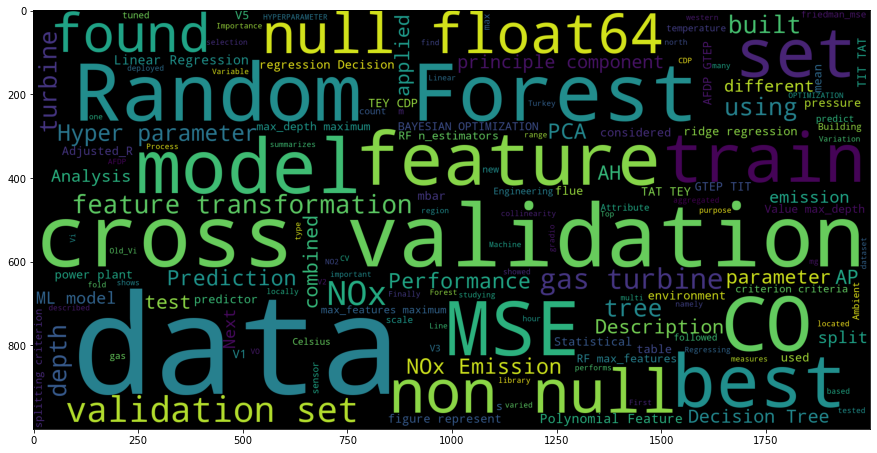

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(myreport))
plt.show()

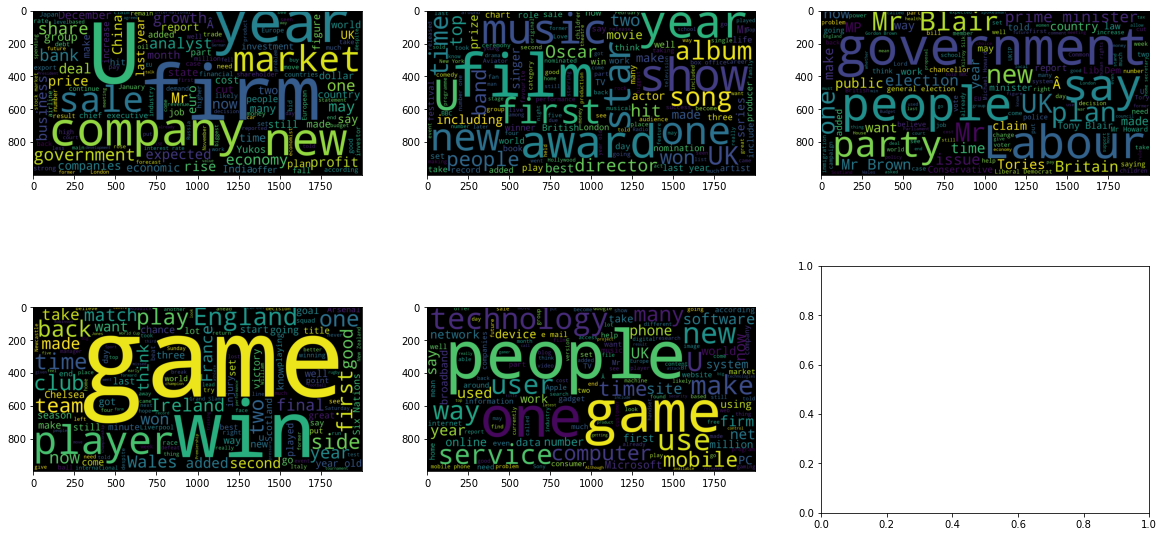

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(20,10))
r=0
c=0
for k in all_files.keys():
    all_ent = ' '.join(all_files[k])
#     plt.figure(figsize=(15,10))
    axs[r,c].imshow(wc.generate_from_text(all_ent))
    
    c +=1
    if c==3:
        r += 1
        c=0

# Regex

In [ ]:
s1 = 'My name is SShahrukhS Gouhar. Hi Shahrukh Gouhar. hi ShahrukH GouhaR'
s2 = 'His name is Shaharukh Gouhar'

In [ ]:
re.findall('Shahrukh Gouhar',s1)

['Shahrukh Gouhar']

In [ ]:
re.findall('Shahrukh Gouhar',s2)

[]

In [ ]:
re.search('Shahrukh Gouhar', s1)

<re.Match object; span=(33, 48), match='Shahrukh Gouhar'>

In [ ]:
re.findall('[hSsarkGhoaurH]+',s2)

['H', 's', 'a', 's', 'Shaharukh', 'Gouhar']

In [ ]:
re.findall("[A-Z][a-z]+",s1)

['My', 'Shahrukh', 'Gouhar', 'Hi', 'Shahrukh', 'Gouhar', 'Shahruk', 'Gouha']

In [ ]:
re.findall("[A-Z]+[a-z]+",s1)

['My', 'SShahrukh', 'Gouhar', 'Hi', 'Shahrukh', 'Gouhar', 'Shahruk', 'Gouha']

In [ ]:
re.findall("[a-z]+[A-Z]+",s1)

['hahrukhS', 'hahrukH', 'ouhaR']

In [ ]:
re.findall("[A-Z][a-z]+[A-Z]+",s1)

['ShahrukhS', 'ShahrukH', 'GouhaR']

In [ ]:
re.findall("[A-Z]+[a-z]+[A-Z]+",s1)

['SShahrukhS', 'ShahrukH', 'GouhaR']

In [ ]:
re.findall("[a-z ]+[A-Z]+",s1)

['y name is SS',
 'hahrukhS',
 ' G',
 ' H',
 'i S',
 'hahrukh G',
 ' hi S',
 'hahrukH',
 ' G',
 'ouhaR']

In [ ]:
s3 = 'My mobile number is 1234567890 and +91123456789'

In [ ]:
re.findall('[0-9]+',s3)

['1234567890', '91123456789']

In [ ]:
s4 = 'The house numbers are A307, BC21, DA497'

In [ ]:
[x for x in re.findall('[A-Z0-9]+',s4) if len(x)>1]

['A307', 'BC21', 'DA497']

In [ ]:
re.findall('[A-Z]+[0-9]+',s4)

['A307', 'BC21', 'DA497']

In [ ]:
re.findall('[A-Z]{1}[0-9]+',s4)

['A307', 'C21', 'A497']

In [ ]:
re.findall('[A-Z]{1,2}[0-9]+',s4)

['A307', 'BC21', 'DA497']

In [ ]:
s = 'The house numbers are A307, BC21, Da497, EAc436'

In [ ]:
re.findall('[A-Z]{1,2}[a-z]?[0-9]+',s)

['A307', 'BC21', 'Da497', 'EAc436']

In [ ]:
print(re.findall('\bclass\b','There is no class today'))
print(re.findall(r'\bclass\b','There is no class today'))
print(re.findall('class','The content could not be declassified'))
# print(re.findall('\bclass\b','The content could not be declassified'))
print(re.findall(r'\bclass\b','The content could not be declassified'))
print(re.findall(r'\bclass\b','The content could not be de,class,ified'))

[]
['class']
['class']
[]
['class']


In [ ]:
print(re.findall(r'^[0-9]+',
                 'From the 19th floor of a different lift to be used'))

[]


In [ ]:
print(re.findall(r'^[0-9]+',
                 '45th floor of a different lift to be used'))

['45']


In [ ]:
print(re.findall(r'floor$',
                 'From the 19th floor of a different lift to be used'))

[]


In [ ]:
print(re.findall(r'floor$',
                 'From the 19th floor'))

['floor']


In [ ]:
para = \
'''
<p>
45th is the last floor.
AT 5th floor, my office is there.
30th floor is the cafetria
</p>
'''

In [ ]:
para

'\n<p>\n45th is the last floor.\nAT 5th floor, my office is there.\n30th floor is the cafetria\n</p>\n'

In [ ]:
print(re.findall(r'^[0-9]+',para))

[]


In [ ]:
print(re.findall(r'^[0-9]+',para, re.MULTILINE))

['45', '30']


In [ ]:
print(re.findall(r'.*floor.$',para,re.MULTILINE))

['45th is the last floor.']


In [ ]:
z = 'AmulChocolateXXX17/10/202064588.5'
y = 'AmulChocolateXXXX17/10/202064.5sdf'
p = 'AmulChocolateXXXXX17/10/202064.5'

re.findall('subhasis.(?=dasgupta)',
           'The names are subhasis dasgupta and subhasis rastogi')

['subhasis ']

In [ ]:
re.findall('(?<=subhasis.)\w+',
           'The names are subhasish dasgupta and subhasis rastogi')

['rastogi']

In [ ]:
re.findall('[A-Za-z]+(?=[A-Z]{4})|[A-Za-z]+(?=[A-Z]{3})',y)

['AmulChocolate', 'X']

In [ ]:
re.findall('[A-Za-z]+(?=[A-Z])',p)

['AmulChocolateXXXX']

In [ ]:
re.findall('(?<=[1-9]{2}/[0-9]{2}/[0-9]{4}).*',z)

['64588.5']

In [ ]:
re.findall('(?<=[0-9]{2}/[0-9]{2}/[0-9]{4}).*',y)

['64.5sdf']

# TFIDF

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all_files = []
for directory in directories:
    file_path = path+directory+'/'
    files = os.listdir(file_path)
    for file in files:
        try:
            f=open(file_path+file).read()
            all_files.append((directory,f))
        except:
            continue

In [ ]:
all_news_df = pd.DataFrame.from_records(data=all_files,columns=['context','text'])
all_news_df.head()

,context,text
0,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,High fuel prices hit BA's profits\n\nBritish A...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...


In [ ]:
all_news_df.shape

(2225, 2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwords,max_df=0.65,min_df=10,
                       token_pattern="[a-z']+")

In [ ]:
tfidf.fit(all_news_df['text'])

TfidfVectorizer(max_df=0.65, min_df=10,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'also', 'am', 'an', 'and', 'any', 'are',
                            "aren't", 'as', 'at', 'be', 'because', 'been',
                            'before', 'being', 'below', 'between', 'both',
                            'but', 'by', 'can', "can't", 'cannot', 'com', ...},
                token_pattern="[a-z']+")

In [ ]:
tfidf_mat = tfidf.transform(all_news_df['text'])
tfidf_mat  # Document trem matrix, # Sparse matrix

<2225x5602 sparse matrix of type '<class 'numpy.float64'>'
	with 280677 stored elements in Compressed Sparse Row format>

# Latent Semantic Analysis (LSA)

Basically a truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
tsvd = TruncatedSVD(n_components=100)

In [ ]:
svd_mat = tsvd.fit_transform(tfidf_mat) # Document aspect matrix

In [ ]:
svd_mat.shape  # Dense matrix

(2225, 100)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [ ]:
Z = linkage(svd_mat, method='complete')

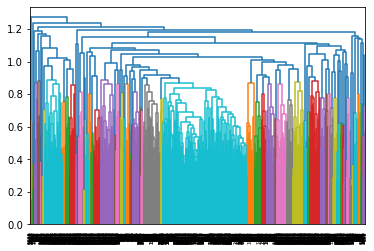

In [ ]:
d = dendrogram(Z)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
contexts_num = le.fit_transform(all_news_df['context'])

In [ ]:
tsne = TSNE(random_state=3)

In [ ]:
tsne_mat = tsne.fit_transform(svd_mat)

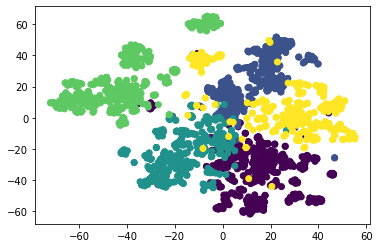

In [ ]:
plt.scatter(tsne_mat[:,0],tsne_mat[:,1], c=contexts_num)